In [28]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import defaultdict
from plotly.subplots import make_subplots
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import time

In [29]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [30]:
data = pd.read_csv('/content/review_data.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product name  14446 non-null  object 
 1   average star  14446 non-null  float64
 2   rating count  14446 non-null  object 
 3   price         14446 non-null  int64  
 4   reviewer      14442 non-null  object 
 5   summary       14445 non-null  object 
 6   review        14438 non-null  object 
 7   score         14446 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 903.0+ KB


In [32]:
data.head()

,product name,average star,rating count,price,reviewer,summary,review,score
0,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Norma,Super cool,I really liked that the Apple Pencil worked sm...,5
1,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,osarumen,It looks real it feels good,I took it out the Package it came and and it ...,5
2,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Reynaldo Oquendo,Apple Pencil is amazing,I use it to write music and it's amazing what ...,5
3,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Mere C,Maybe a future convert...,"Purchased to use with my iPad for grad school,...",5
4,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,George Watkins,Apple pencil,Working good with the Apple ipad air (10.9-inc...,5


In [33]:
df = data[data['score'] != 3].dropna().reset_index()
# Loại bỏ các bình luận có điểm = 3, Neutral

In [34]:
data.head()

,product name,average star,rating count,price,reviewer,summary,review,score
0,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Norma,Super cool,I really liked that the Apple Pencil worked sm...,5
1,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,osarumen,It looks real it feels good,I took it out the Package it came and and it ...,5
2,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Reynaldo Oquendo,Apple Pencil is amazing,I use it to write music and it's amazing what ...,5
3,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Mere C,Maybe a future convert...,"Purchased to use with my iPad for grad school,...",5
4,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,George Watkins,Apple pencil,Working good with the Apple ipad air (10.9-inc...,5


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product name  14446 non-null  object 
 1   average star  14446 non-null  float64
 2   rating count  14446 non-null  object 
 3   price         14446 non-null  int64  
 4   reviewer      14442 non-null  object 
 5   summary       14445 non-null  object 
 6   review        14438 non-null  object 
 7   score         14446 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 903.0+ KB


In [36]:
# Loại bỏ các review không phải tiếng Anh
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
for i in range(len(df)):
  df.loc[i,'review'] = " ".join(w for w in nltk.wordpunct_tokenize(df.loc[i,'review'])  if w.lower() in english_vocab or not w.isalpha())

In [37]:
# loại bỏ stopwords
stopwords = nltk.corpus.stopwords.words("english")
for i in range(len(df)):
  df.loc[i,'review'] = " ".join(w for w in nltk.wordpunct_tokenize(df.loc[i,'review'])  if w.lower() not in stopwords )

In [38]:
df.review = df.review.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)) .translate(str.maketrans('','',string.digits)).strip())

In [39]:
sia = SentimentIntensityAnalyzer()
sentiment_score =[]
for i in range(len(df)):
  sc = sia.polarity_scores(df.loc[i,'review'])['compound']
  sentiment_score.append(sc)
df['sentiment_score'] = pd.Series(sentiment_score)


In [40]:
# đánh giá sentiment của nltk
# Chỉ sử dụng review đã qua xử lí
good = 0
bad = 0
for i in range(len(df)):
  if (df.loc[i,'sentiment_score'] > 0 and df.loc[i,'score'] > 3) or (df.loc[i,'sentiment_score'] < 0 and df.loc[i,'score'] < 3):
    good += 1
  elif (df.loc[i,'sentiment_score'] < 0 and df.loc[i,'score'] > 3) or (df.loc[i,'sentiment_score'] > 0 and df.loc[i,'score'] < 3):
    bad += 1
  else: 
    pass
print('score:',good/len(df))

score: 0.7057430432208407


In [41]:
sia = SentimentIntensityAnalyzer()
df.sentiment_score_summary = pd.Series([])
for i in range(len(df)):
  df.loc[i,'sentiment_score_summary'] = sia.polarity_scores(df.loc[i,'summary'])['compound']
df.head(100)

<ipython-input-41-bb371097286d>:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-41-bb371097286d>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,index,product name,average star,rating count,price,reviewer,summary,review,score,sentiment_score,sentiment_score_summary
0,0,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Norma,Super cool,really Apple Pencil worked smoothly,5,0.0000,0.7351
1,1,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,osarumen,It looks real it feels good,took Package came well,5,0.2732,0.4404
2,2,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Reynaldo Oquendo,Apple Pencil is amazing,use write music amazing apple pencil,5,0.5859,0.5859
3,3,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Mere C,Maybe a future convert...,use grad school amazed done pencil intuitiv...,5,0.7845,0.0000
4,4,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,George Watkins,Apple pencil,Working good Apple air inch Wi Fi GB,5,0.4404,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
95,103,Samsung 970 EVO Plus SSD 2TB NVMe M.2 Internal...,4.9,"44,406 ratings",184,Blackout,Awesome!,M way go performance incredible ease install...,5,0.9451,0.6588
96,104,Samsung 970 EVO Plus SSD 2TB NVMe M.2 Internal...,4.9,"44,406 ratings",184,carlossaucedo,2 año de uso,Excelente Con h un poco sus De mb,5,0.0000,0.0000
97,105,Samsung 970 EVO Plus SSD 2TB NVMe M.2 Internal...,4.9,"44,406 ratings",184,XU GUI LIAN,Very good very fast,reading writing speed fast whole computer spe...,5,0.3400,0.4927
98,107,Samsung 970 EVO Plus SSD 2TB NVMe M.2 Internal...,4.9,"44,406 ratings",184,Amy Williams,DO NOY BUY BRICKED MY COMPUTER!!!!!!,PURCHASE COMPUTER DATA FACTORY RESET ENTIRE ...,1,-0.4404,0.0000


In [42]:
# Sử dụng review đã qua xử lí và summary
good = 0
bad = 0
for i in range(len(df)):
  if ((df.loc[i,'sentiment_score'] + df.loc[i,'sentiment_score_summary']) > 0 and df.loc[i,'score'] > 3) or ((df.loc[i,'sentiment_score'] + df.loc[i,'sentiment_score_summary']) < 0 and df.loc[i,'score'] < 3):
    good += 1
  elif ((df.loc[i,'sentiment_score'] + df.loc[i,'sentiment_score_summary']) < 0 and df.loc[i,'score'] > 3) or ((df.loc[i,'sentiment_score'] + df.loc[i,'sentiment_score_summary']) > 0 and df.loc[i,'score'] < 3):
    bad += 1
  else: 
    pass
print('score:',good/len(df))

score: 0.7860420367081113


In [43]:
sentiment_score_total = []
for i in range(len(df)):
  sst = (df.loc[i,'sentiment_score'] + df.loc[i,'sentiment_score_summary'])/2
  sentiment_score_total.append(sst)
df['sentiment_score_total'] = pd.Series(sentiment_score_total)

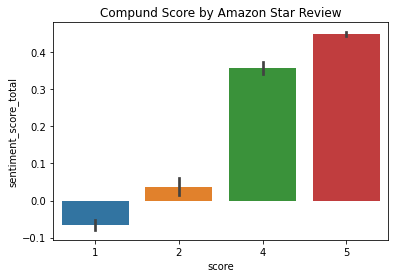

In [44]:
ax = sns.barplot(data=df, x='score', y='sentiment_score_total')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



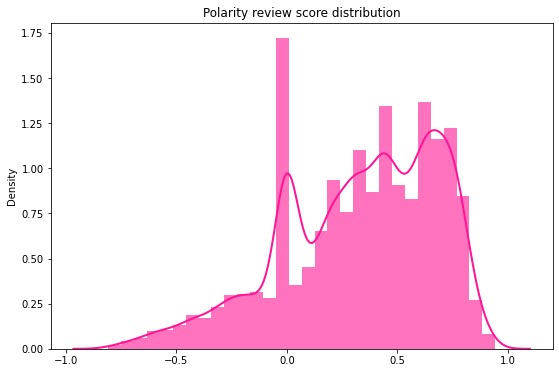

In [45]:
plt.figure(figsize = (9,6))
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(list(df.sentiment_score_total),bins = 30, kde = True, color = 'deeppink',**kwargs)
plt.title('Polarity review score distribution')
plt.show()

In [46]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
df.head(5)

,index,product name,average star,rating count,price,reviewer,summary,review,score,sentiment_score,sentiment_score_summary,sentiment_score_total,word_count
0,0,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Norma,Super cool,really Apple Pencil worked smoothly,5,0.0000,0.7351,0.36755,5
1,1,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,osarumen,It looks real it feels good,took Package came well,5,0.2732,0.4404,0.35680,4
2,2,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Reynaldo Oquendo,Apple Pencil is amazing,use write music amazing apple pencil,5,0.5859,0.5859,0.58590,6
3,3,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,Mere C,Maybe a future convert...,use grad school amazed done pencil intuitiv...,5,0.7845,0.0000,0.39225,12
4,4,Apple Pencil (2nd Generation),4.8,"69,780 ratings",85,George Watkins,Apple pencil,Working good Apple air inch Wi Fi GB,5,0.4404,0.0000,0.22020,8


In [47]:
review_pos = df[df['sentiment_score_total'] > 0].dropna()
review_neg = df[df['sentiment_score_total'] < 0].dropna()
def generate_ngrams(text, n_gram = 2):
  token = [token for token in text.lower().split(" ") if token != ""]
  ngrams = zip(*[token[i:] for i in range(n_gram)])
  return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
  trace = go.Bar(
    y=df["word"].values[::-1],
    x=df["wordcount"].values[::-1],
    showlegend=False,
    orientation = 'h',
    marker=dict(color=color,),)
  return trace
# positive reviews
freq_dict = defaultdict(int)
for sent in review_pos["review"]:
  for word in generate_ngrams(sent):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')
# negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')
# create sub plot
fig = make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews","Frequent words of negative reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In [48]:
X = df.review
y_dict = {1:0,2:0,4:1,5:1}
y = df['score'].map(y_dict)


In [49]:
c = CountVectorizer()
tfidf = TfidfVectorizer()
tfidf_n = TfidfVectorizer(ngram_range=(1,2))

In [59]:
def text_fit(X,y,model,clf_model):
  X_c = model.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
  print('# features: {}'.format(X_c.shape[1]))
  print('# train records: {}'.format(X_train.shape[0]))
  print('# test records: {}'.format(X_test.shape[0]))
  start_time = time.time() #Start
  clf = clf_model.fit(X_train, y_train)
  end_time = time.time() #End
  #Calculating duration
  elapsed_time = end_time - start_time
  print("# elapsed_time: {0}".format(elapsed_time) + "[sec]")
  acc = clf.score(X_test, y_test)
  print ('Model Accuracy: {}'.format(acc))

In [60]:
text_fit(X,y,c,svm.SVC())

# features: 7555
# train records: 10134
# test records: 3378
# elapsed_time: 10.911058902740479[sec]
Model Accuracy: 0.8845470692717584


In [61]:
text_fit(X,y,tfidf,svm.SVC())

# features: 7555
# train records: 10134
# test records: 3378
# elapsed_time: 12.31245756149292[sec]
Model Accuracy: 0.9094138543516874


In [62]:
text_fit(X,y,tfidf_n,svm.SVC())

# features: 143224
# train records: 10134
# test records: 3378
# elapsed_time: 29.457540035247803[sec]
Model Accuracy: 0.8966844286560095


In [63]:
text_fit(X,y,c,KNeighborsClassifier(n_neighbors = 2))

# features: 7555
# train records: 10134
# test records: 3378
# elapsed_time: 0.002763032913208008[sec]
Model Accuracy: 0.8111308466548254


In [64]:
text_fit(X,y,tfidf,KNeighborsClassifier(n_neighbors = 2))

# features: 7555
# train records: 10134
# test records: 3378
# elapsed_time: 0.0038423538208007812[sec]
Model Accuracy: 0.8060982830076968


In [65]:
text_fit(X,y,tfidf_n,KNeighborsClassifier(n_neighbors = 2))

# features: 143224
# train records: 10134
# test records: 3378
# elapsed_time: 0.003919124603271484[sec]
Model Accuracy: 0.8093546477205447
